<a href="https://colab.research.google.com/github/TaeminDA/portfolio/blob/main/tsa/Fianancial_Time_Series_Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK General Industry Data

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  statsmodels
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [5]:
ts = pd.read_excel('/content/general_industry.xlsx', sheet_name = 'Sheet 1')
ts.head()

,date,general
0,1998-03-15,111.6
1,1998-04-15,100.3
2,1998-05-15,101.7
3,1998-06-15,105.7
4,1998-07-15,102.4


In [6]:
ts.date = pd.to_datetime(ts.date)

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     260 non-null    datetime64[ns]
 1   general  260 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


Text(0.5, 1.0, 'General Industry')

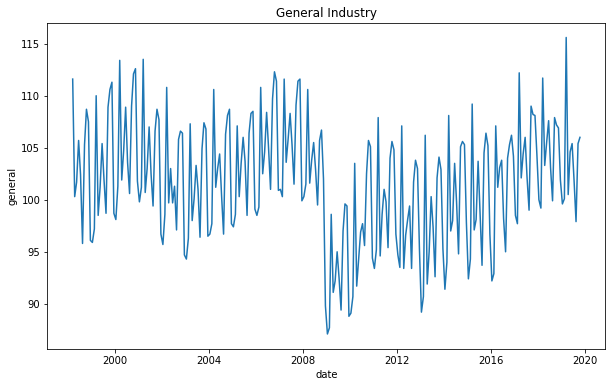

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = ts.date, y = ts.general)
plt.title('General Industry')

## ARIMA Model

### Stationarity

Stationarity</br>
The Time series data model works on stationary data. The stationarity of data is described by the following three criteria:</br>
</br>
1) It should have a constant mean
</br>
2) It should have a constant variance
</br>
3) Auto covariance does not depend on the time
</br>

Text(0.5, 1.0, 'Histogram')

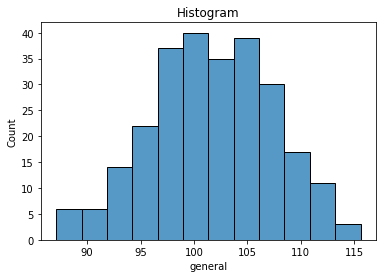

In [125]:
sns.histplot(ts.general)
plt.title("Histogram")

In [145]:
0.4*len(ts.general)

104.0

In [156]:
a = int(0.3*len(ts.general))
b = int(0.4*len(ts.general))

sub1, sub2, sub3 = np.split(ts.general.sample(frac=1),
                           [a, a + b])

In [157]:
mean1, mean2, mean3 = sub1.mean(), sub2.mean(), sub3.mean()
var1, var2, var3 = sub1.var(), sub2.var(), sub3.var()

In [158]:
print(mean1, mean2, mean3)
print(var1, var2, var3)

101.05641025641026 101.72596153846153 102.2717948717949
29.02093240093239 33.83300877520536 35.404648684648684


the means and variances are similar, which => stationary data

### Dickey-Fuller Test for Stationarity

In [159]:
from statsmodels.tsa.stattools import adfuller

In [160]:
adf_test = adfuller(ts.general,)

print("ADF = " + str(adf_test[0]))
print("p-value = " +str(adf_test[1]))

ADF = -3.084617052528593
p-value = 0.02771273924023468


p-value is less than 0.05 </br>

we can reject the null (unit root, non-stationary data) and can assume our data is stationary.

In [161]:
adf_test

(-3.084617052528593,
 0.02771273924023468,
 13,
 246,
 {'1%': -3.457215237265747,
  '10%': -2.5730700760129555,
  '5%': -2.873361841566324},
 967.5661452787351)

### Decomposition

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose

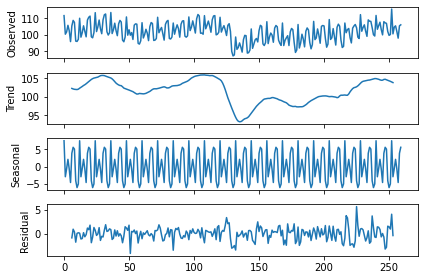

In [231]:
sd = seasonal_decompose(ts.general, model="additive",freq=12) # monthly data => 12 months per year
sd.plot()
plt.show()

## PACF and ACF

- The autocorrelation function declines to near zero rapidly for a stationary time series. In contrast, the ACF drops slowly for a non-stationary time series.

- When seasonal patterns are present, the autocorrelations are larger for lags at multiples of the seasonal frequency than for other lags. When a time series has both a trend and seasonality, the ACF plot displays a mixture of both effects.

- The autocorrelation function helps assess the properties of a time series. In contrast, the partial autocorrelation function (PACF) is more useful during the specification process for an autoregressive model. 

- Typically, you will use the ACF to determine whether an autoregressive model is appropriate. If it is, you then use the PACF to help you choose the model terms.

- Choosing p and q
Finding appropriate values of p and q in the ARMA(p,q) model can be facilitated by plotting the partial autocorrelation functions for an estimate of p, and likewise using the autocorrelation functions for an estimate of q. Extended autocorrelation functions (EACF) can be used to simultaneously determine p and q. Further information can be gleaned by considering the same functions for the residuals of a model fitted with an initial selection of p and q.

- Brockwell & Davis recommend using Akaike information criterion (AIC) for finding p and q. Another possible choice for order determining is the BIC criterion.

- the ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend.

### Partial AutoCorrelation Function (PACF).

In [113]:
pacf = statsmodels.tsa.stattools.pacf(ts.general)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [116]:
pacf

array([ 1.        ,  0.34847001, -0.06021894,  0.10835917,  0.33694807,
        0.03230688,  0.43480125, -0.01168607,  0.29409723, -0.30730529,
       -0.26778029,  0.25766509,  0.73697626, -0.73323932, -0.25722283,
       -0.17206613,  0.09599329,  0.22035906, -0.30590131, -0.33201723,
        0.33336261,  0.48239762,  0.29840957, -0.55061329, -0.28890622,
        0.61854021,  1.58860027,  0.24530608,  4.82711001, -0.67820393,
       -0.79150345, -0.08385816,  0.48171837,  0.3166882 , -0.10642495,
       -0.36087422,  0.11194686,  0.19017632, -0.03704627, -0.33553128,
       -0.05949238])

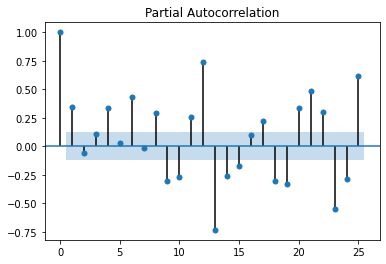

In [233]:
sm.graphics.tsa.plot_pacf(ts.general)
plt.show()

### AutoCorrelation Function (ACF)

In [121]:
statsmodels.tsa.stattools.acf(ts.general)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.34712974,  0.06799776,  0.09804359,  0.35414451,
        0.25151057,  0.4158296 ,  0.24249613,  0.30473543,  0.02307727,
       -0.03246207,  0.21436014,  0.79272313,  0.18329593, -0.08499074,
       -0.06843557,  0.1748599 ,  0.08075325,  0.22641479,  0.05431948,
        0.12243551, -0.1392192 , -0.18837211,  0.05459385,  0.6166341 ,
        0.05376475, -0.19505447, -0.17645412,  0.06459309, -0.01650951,
        0.13317407, -0.01263507,  0.06325404, -0.17361273, -0.2116675 ,
        0.0176889 ,  0.55038827,  0.0338181 , -0.19446007, -0.18035749,
        0.06222377])

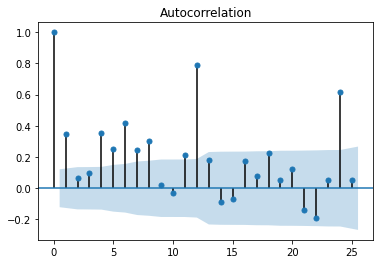

In [122]:
sm.graphics.tsa.plot_acf(ts.general)
plt.show()

## ARIMA Model Appilcation

In [212]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [234]:
arma_order_select_ic(ts.general, max_ar=6, max_ma=6, ic='bic')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lo

{'bic':              0            1            2  ...            4            5            6
 0  1655.730270  1628.309255  1631.092065  ...  1576.533752  1561.173709  1800.259058
 1  1627.538514  1631.864104  1536.792586  ...  1556.961588  1562.509827  1566.435863
 2  1632.101295  1637.395317          NaN  ...  1519.199180  1567.692449  1540.568360
 3  1634.625627  1606.586999  1590.165796  ...  1566.441019  1569.248366  1535.894749
 4  1609.357986  1548.151672  1552.269169  ...  1580.680309  1585.355242  1504.519648
 5  1614.751267  1553.666993  1538.669819  ...  1544.678490  1499.425920  1481.643778
 6  1569.356684  1626.864177  1616.362606  ...  1448.911265  1507.115955  1541.137323
 
 [7 rows x 7 columns], 'bic_min_order': (6, 4)}

In [244]:
# best
p = 12
d = 0
q = 4

In [245]:
arima_model = ARIMA(ts.general, order=(p,d,q))
arima_model = arima_model.fit(disp = 0)

In [246]:
print(arima_model.summary())

                              ARMA Model Results                              
Dep. Variable:                general   No. Observations:                  260
Model:                    ARMA(12, 4)   Log Likelihood                -521.884
Method:                       css-mle   S.D. of innovations              1.713
Date:                Fri, 16 Jul 2021   AIC                           1079.767
Time:                        15:42:53   BIC                           1143.860
Sample:                             0   HQIC                          1105.533
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            101.9637      1.526     66.811      0.000      98.973     104.955
ar.L1.general     -0.1156      0.044     -2.636      0.009      -0.202      -0.030
ar.L2.general     -0.0280      0.040

In [247]:
# # plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# residuals.plot(kind='kde')

In [248]:
predicted = arima_model.predict()

In [249]:
len(ts.general)

260

In [250]:
len(predicted)

260

Text(0.5, 1.0, 'ARIMA Forecast (12,0,4)')

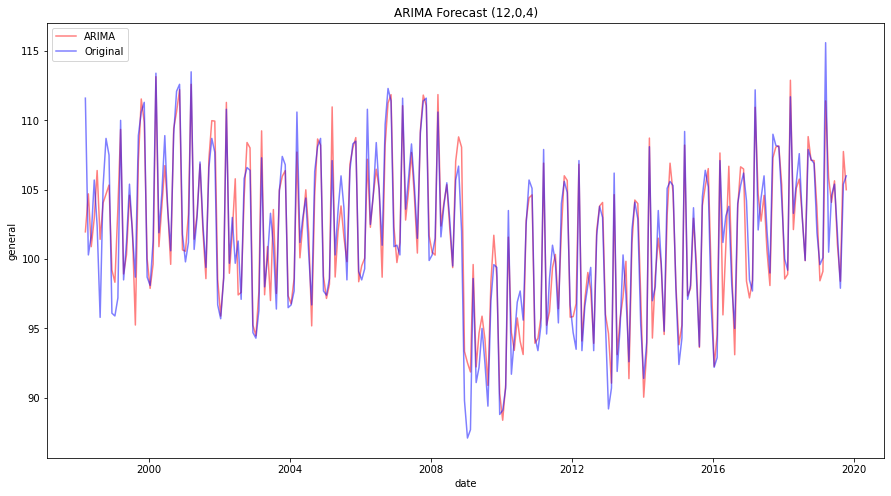

In [251]:
plt.figure(figsize = (15,8))

sns.lineplot(x = ts.date, y = predicted, label = 'ARIMA', alpha = 0.5, color = 'red')
sns.lineplot(x = ts.date, y = ts.general, label = 'Original', alpha = 0.5,color = 'blue')

plt.title('ARIMA Forecast ({},{},{})'.format(p,d,q))